##                                                         Fire Weather Index Prediction Project
## Milestone1
###  Module 1: Data Collection:


  

In [37]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
print("imported successfully")

imported successfully


#### loaded the dataset into pandas Dataframe

In [38]:
#loading the dataset
import pandas as pd
df = pd.read_csv("fwi.xlsx.csv")
print("loaded the dataset using pandas") 


loaded the dataset using pandas


In [39]:
df.head()



,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia


#### checked the datatype for each feature

In [40]:
#datatype of  eachfeature
print("Data Type of Each Column:")
print(df.dtypes)

Data Type of Each Column:
day              int64
month            int64
year             int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC              object
ISI            float64
BUI            float64
FWI             object
Classes         object
Region          object
dtype: object


In [41]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,Sidi-Bel Abbes


In [42]:
print(df.shape)
print(df.columns)

(244, 15)
Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')


#### checking for duplicate rows in dataset

In [43]:
#duplicate values in dataset
print("\nChecking for Duplicate Rows:")
print(df.duplicated().sum())
df=df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)


Checking for Duplicate Rows:
0
Shape after dropping duplicates: (244, 15)


#### Basic information about the dataset

In [44]:
print("\n information about the dataset:")
print(df.info())


 information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB
None


#### Statistical summary of dataset

In [45]:
#basic statistical summary of dataset
print("\n Statistical summary of the dataset:")
df.describe()


 Statistical summary of the dataset:


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000


 ## Module2:Data Exploration and Data preprocessing:

#### Cleaning column names


In [46]:
df.columns = (
    df.columns
        .str.strip()          # remove leading/trailing spaces
        .str.replace(" ", "_")# replace spaces with underscores
        .str.replace("-", "_")# replace hyphens
        .str.replace("/", "_")# replace slashes
        .str.lower()          # convert to lowercase
)
print("Cleaned column names:")
print(df.columns)

Cleaned column names:
Index(['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc',
       'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes', 'region'],
      dtype='object')


In [47]:
df['dc'] = pd.to_numeric(df['dc'], errors='coerce')
df['fwi'] = pd.to_numeric(df['fwi'], errors='coerce')
print("\n Converted 'dc' and 'fwi' to numeric types.")
print(df[['dc','fwi']].dtypes)



 Converted 'dc' and 'fwi' to numeric types.
dc     float64
fwi    float64
dtype: object


#### Checking for missing values and handled

In [48]:
print("\nChecking for Missing Values:")
print(df.isnull().sum())

#rows with missing values
rows_with_missing = df[df.isnull().any(axis=1)]
print("Rows with missing values: \n",rows_with_missing)

#no of missing values
print("\nTotal number of rows with missing values:")
print(len(rows_with_missing))





Checking for Missing Values:
day            0
month          0
year           0
temperature    0
rh             0
ws             0
rain           0
ffmc           0
dmc            0
dc             1
isi            0
bui            0
fwi            1
classes        1
region         0
dtype: int64
Rows with missing values: 
      day  month  year  temperature  rh  ws  rain  ffmc   dmc  dc   isi   bui  \
165   14      7  2012           37  37  18   0.2  88.9  12.9 NaN  12.5  10.4   

     fwi classes          region  
165  NaN     NaN  Sidi-Bel Abbes  

Total number of rows with missing values:
1


In [49]:
# Dropping rows with missing values
before = df.shape[0]
df = df.dropna()
after = df.shape[0]

print("Rows before dropping:", before)
print("Rows after dropping:", after)
print("Rows removed:", before - after)


Rows before dropping: 244
Rows after dropping: 243
Rows removed: 1


#### Outlier Detection Using Boxplots


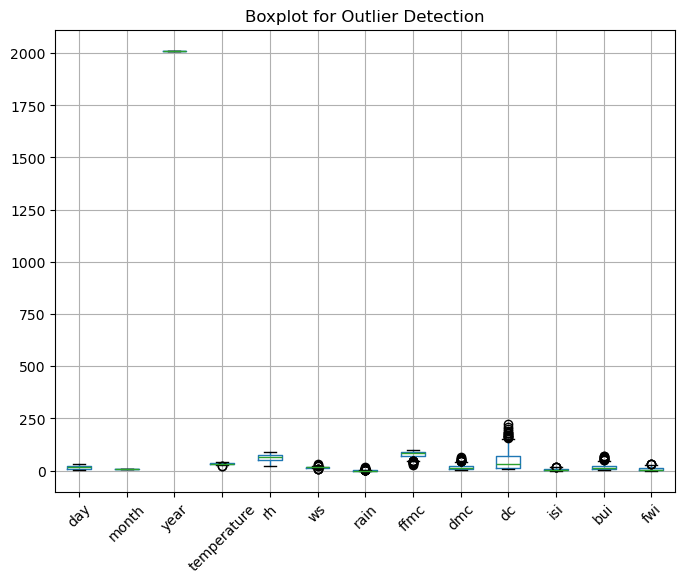


Outliers in day:
Series([], Name: day, dtype: int64)

Outliers in month:
Series([], Name: month, dtype: int64)

Outliers in year:
Series([], Name: year, dtype: int64)

Outliers in temperature:
93     22
105    22
Name: temperature, dtype: int64

Outliers in rh:
Series([], Name: rh, dtype: int64)

Outliers in ws:
2      22
52     22
105    26
176     9
199     9
232     8
237     6
241    29
Name: ws, dtype: int64

Outliers in rain:
1       1.3
2      13.1
3       2.5
14      3.1
38      1.4
91     16.8
92      7.2
93     10.1
94      3.8
101     1.8
102     1.8
104     4.6
105     8.3
116     5.8
120     1.8
121     1.4
123     4.0
124     2.0
129     1.3
134     2.0
138     4.7
139     8.7
140     4.5
151     1.7
152     2.2
159     6.0
160     1.9
161     3.8
162     2.9
188     3.1
189     2.9
218     4.1
219     6.5
237     2.0
240     4.4
Name: rain, dtype: float64

Outliers in ffmc:
2      47.1
3      28.6
15     36.1
16     37.3
92     46.0
93     30.5
94     42.6
104    40.9
1

In [50]:

#Boxplot for visual outlier detection
plt.figure(figsize=(8, 6))
df.select_dtypes(include=['float64', 'int64']).boxplot()
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()
# IQR Outlier Detection (Simple Version)
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)][column]
    print(f"\nOutliers in {column}:")
    print(outliers)


#### Distribution Analysis of Numerical Features



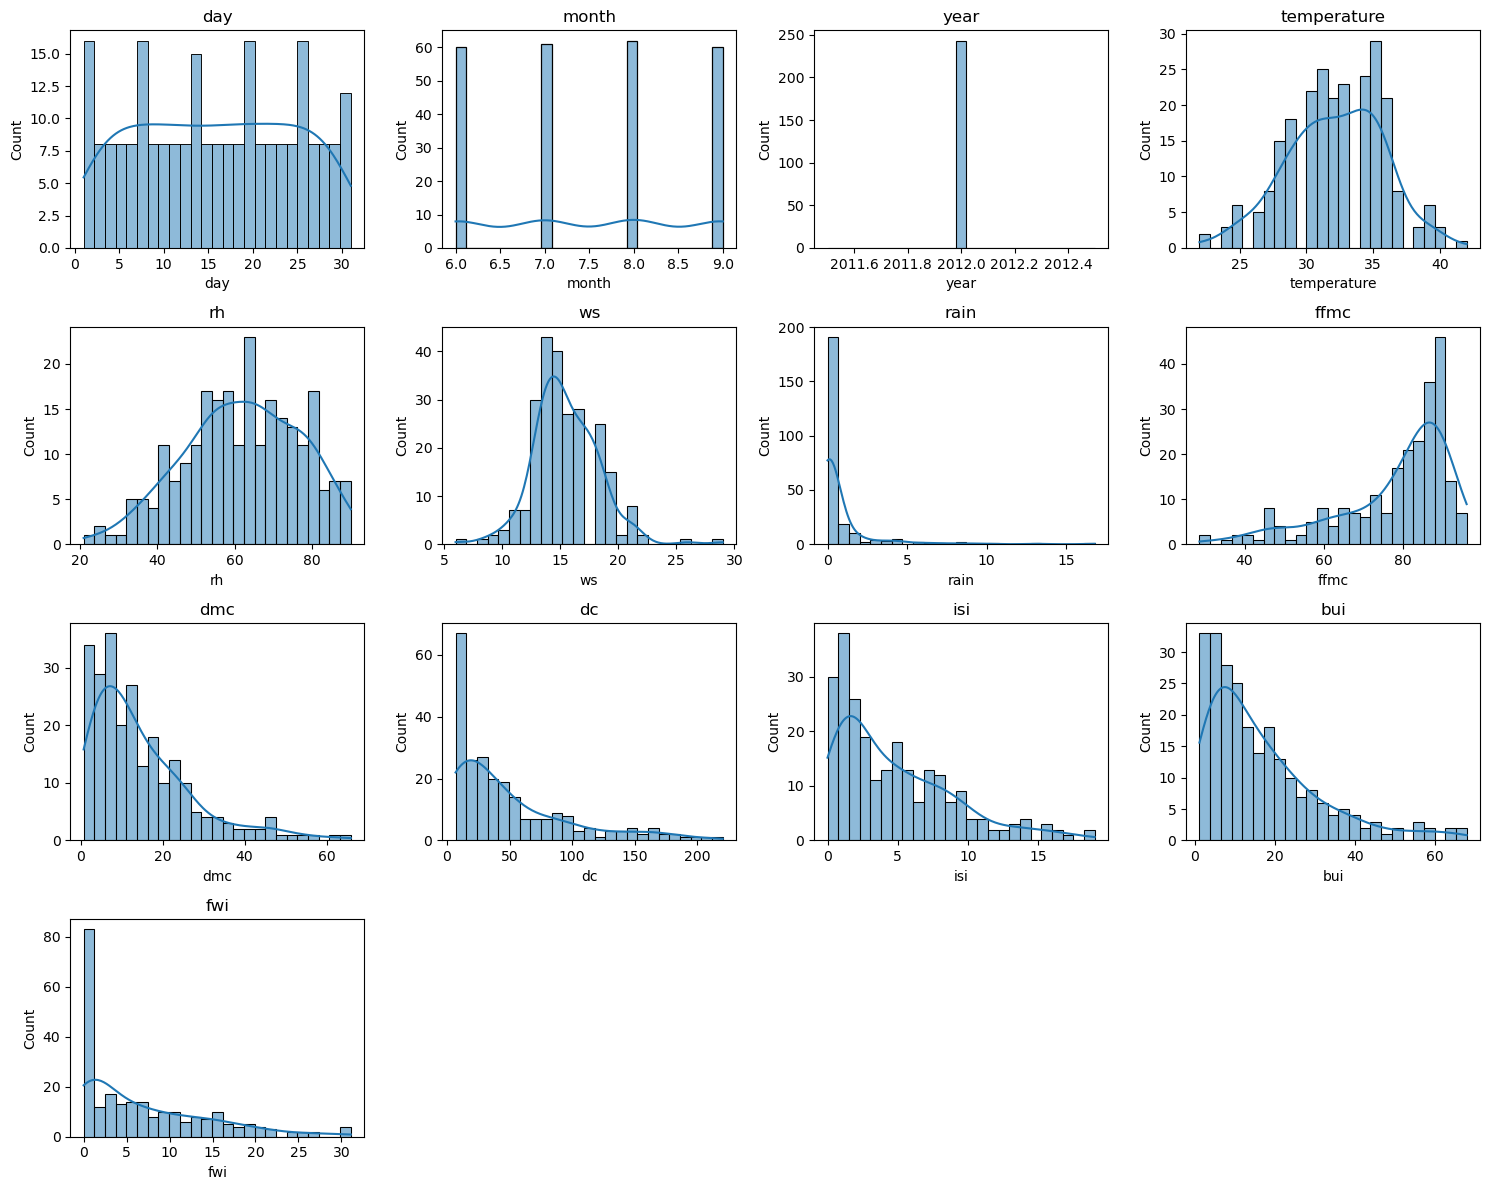

In [51]:
# Histograms and Density Plots for Numerical Columns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)  # adjust based on number of columns
    sns.histplot(df[col], kde=True, bins=25)
    plt.title(col)
    plt.tight_layout()
plt.show()


#### Correlation heatmap to visualize correlations among all numerical variables

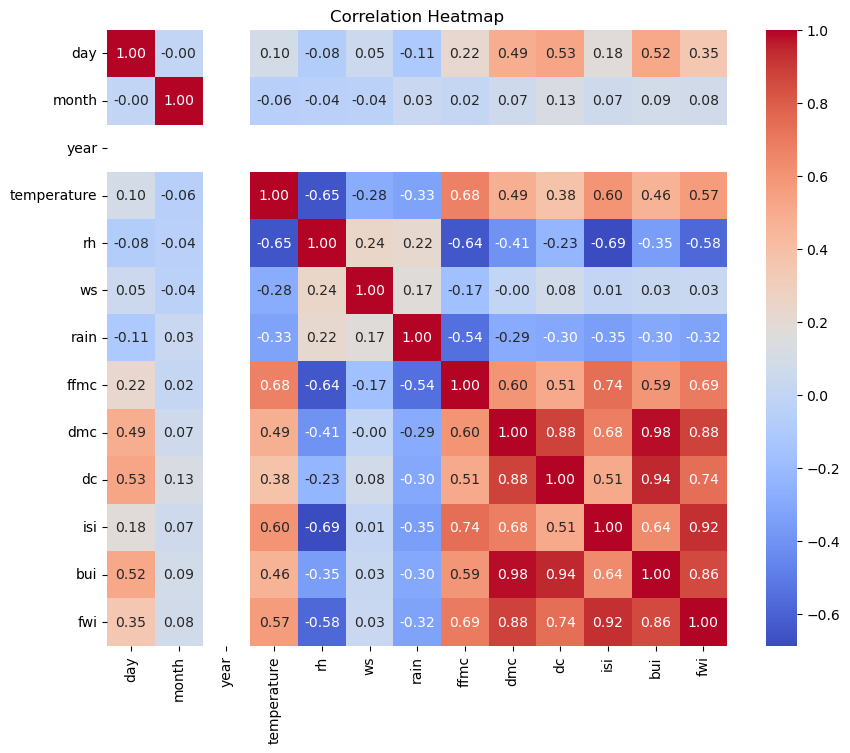

In [52]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



#### Pair Plots for Visualizing Feature Relationships


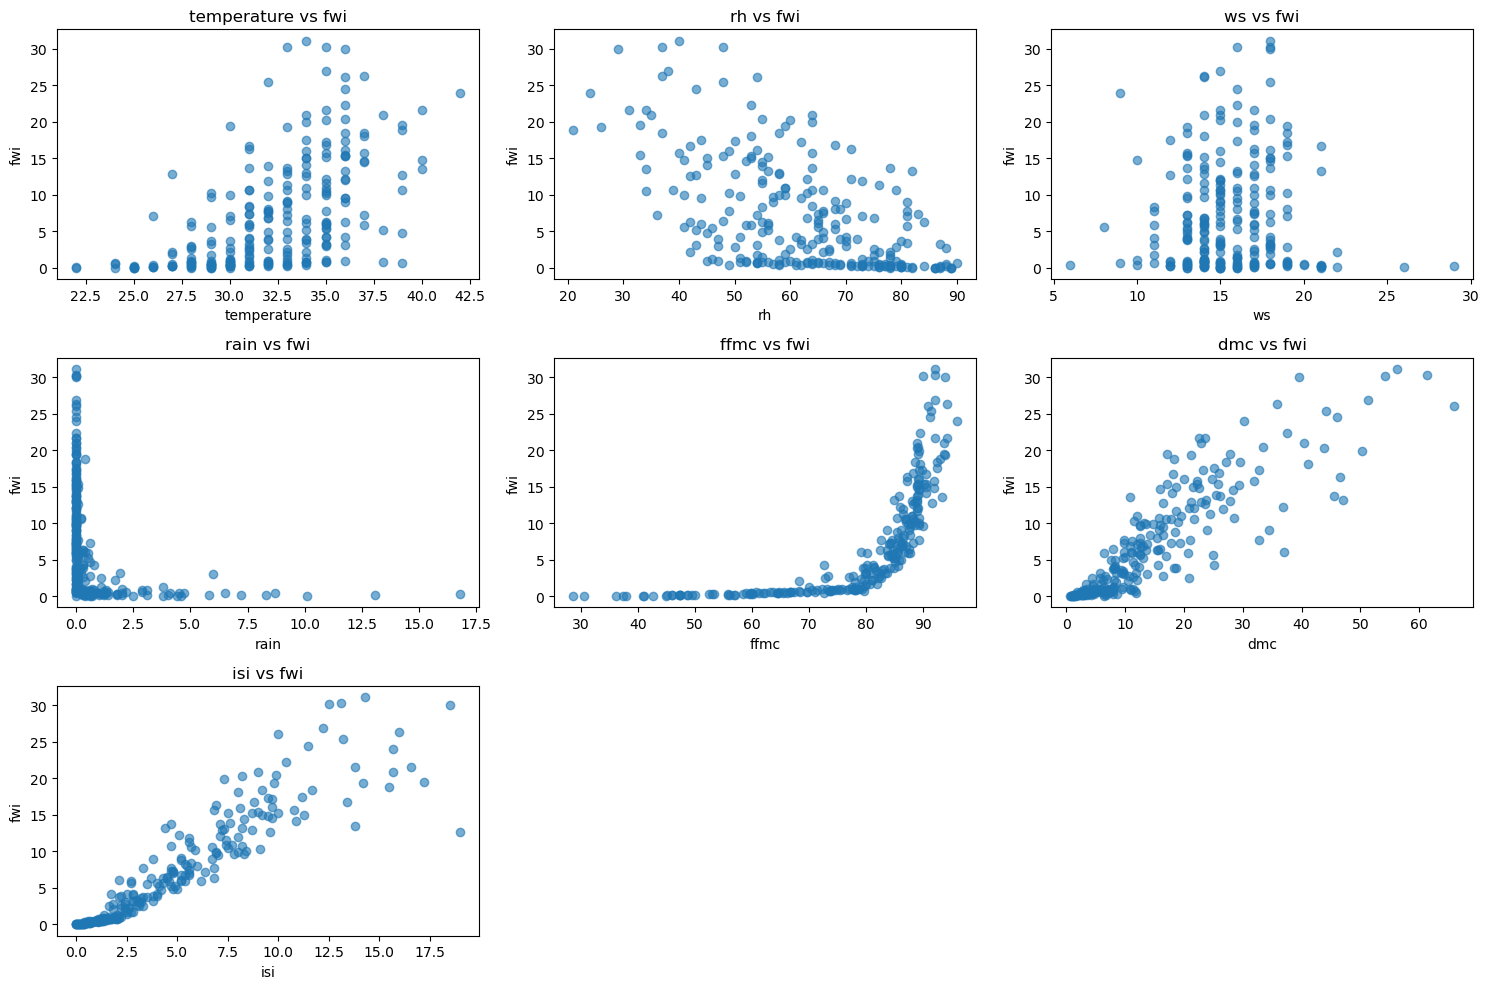

In [53]:
# Simple pair plot for selected features
 
features = ['temperature', 'rh', 'ws', 'rain', 'ffmc', 'dmc', 'isi']

plt.figure(figsize=(15, 10))

for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df[col], df['fwi'], alpha=0.6)
    plt.title(f"{col} vs fwi")
    plt.xlabel(col)
    plt.ylabel("fwi")

plt.tight_layout()
plt.show()


In [54]:
# Label encoding the region column

# I created a LabelEncoder object
le_region = LabelEncoder()

# I applied it on the region column to convert the text into numbers
df['region_encoded'] = le_region.fit_transform(df['region'])

# Just checking the first few encoded values
print(df[['region', 'region_encoded']].head())

# This shows how each region was converted into a number
region_mapping = dict(zip(le_region.classes_, le_region.transform(le_region.classes_)))
print("Region mapping:", region_mapping)

# Changing the encoded values to category type (optional)
df['region_encoded'] = df['region_encoded'].astype('category')

# Checking the data types after encoding
print(df[['region', 'region_encoded']].dtypes)



   region  region_encoded
0  Bejaia               0
1  Bejaia               0
2  Bejaia               0
3  Bejaia               0
4  Bejaia               0
Region mapping: {'Bejaia': np.int64(0), 'Sidi-Bel Abbes': np.int64(1)}
region              object
region_encoded    category
dtype: object


In [55]:
df = df.drop(columns=['classes'])

print("Updated columns after dropping 'classes':")
print(df.columns)


Updated columns after dropping 'classes':
Index(['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc',
       'dmc', 'dc', 'isi', 'bui', 'fwi', 'region', 'region_encoded'],
      dtype='object')


#### Final checking 

In [56]:
print("Columns:", df.columns)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nDuplicate rows:", df.duplicated().sum())
print("\nDescribe:\n", df.describe())


Columns: Index(['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc',
       'dmc', 'dc', 'isi', 'bui', 'fwi', 'region', 'region_encoded'],
      dtype='object')

Missing values:
 day               0
month             0
year              0
temperature       0
rh                0
ws                0
rain              0
ffmc              0
dmc               0
dc                0
isi               0
bui               0
fwi               0
region            0
region_encoded    0
dtype: int64

Data types:
 day                  int64
month                int64
year                 int64
temperature          int64
rh                   int64
ws                   int64
rain               float64
ffmc               float64
dmc                float64
dc                 float64
isi                float64
bui                float64
fwi                float64
region              object
region_encoded    category
dtype: object

Duplicate rows: 0

Describe:
               day       month 

#### Saved the cleaned dataset for further analysis

In [57]:
df.to_csv("cleaned_FWI_dataset.csv", index=False)
print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


## Summary
In Module 2,
 I focused on preparing the dataset for modeling by performing several data cleaning and analysis steps. I started by cleaning the column names to remove spaces, convert them to lowercase, and make them easier to work with. After loading the dataset, I checked for missing values across all rows and columns, and confirmed that there were no null values present.

Next, I converted important numeric columns like DC and FWI into float type to ensure they were ready for mathematical operations. The region column was then label-encoded so it could be used in machine learning models. Since the classes column was not required for the regression task, I removed it from the dataset.

After cleaning, I generated boxplots to visually detect outliers in the numeric features and used scatterplots to study the relationship between each feature and the FWI value. I also created a correlation heatmap to understand how different features are related to one another.

Finally, I saved the fully cleaned dataset as cleaned_FWI_dataset.csv, which is now ready for further processing in Module 3.

# Milestone2

## Module3:Feature Engineering and Scaling 


#### loading the cleaned dataset into pandas

In [58]:
df=pd.read_csv("cleaned_FWI_dataset.csv")
print("Reloaded cleaned dataset:")


Reloaded cleaned dataset:


### Feature selection using correlation analysis

In [59]:
df_no_date = df.drop(columns=['day', 'month', 'year'])
corr = df_no_date.corr(numeric_only=True)['fwi'].abs().sort_values(ascending=False)
corr


fwi               1.000000
isi               0.922895
dmc               0.875864
bui               0.857973
dc                0.739521
ffmc              0.691132
rh                0.580957
temperature       0.566670
rain              0.324422
region_encoded    0.197102
ws                0.032368
Name: fwi, dtype: float64

### features with>=0.3 are selected for model training

In [60]:
selected_features = corr[corr >= 0.3].index
selected_features


Index(['fwi', 'isi', 'dmc', 'bui', 'dc', 'ffmc', 'rh', 'temperature', 'rain'], dtype='object')

### input features x and target variable y are prepared from the selected dataset

In [61]:
df_selected = df[selected_features]
X = df_selected.drop(columns=['fwi'])
y = df_selected['fwi']
print(list(X.columns))


['isi', 'dmc', 'bui', 'dc', 'ffmc', 'rh', 'temperature', 'rain']


#### The dataset is split into training and testing sets using a  train–test split.


In [62]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (194, 8) (194,)
Testing set: (49, 8) (49,)


### Features are scaled using StandardScaler and verified using summary statistics.



In [63]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# Display output to verify scaling
print("Shape of scaled training data:", X_train_scaled_df.shape)
print("\nStatistical summary of scaled training data:")
print(X_train_scaled_df.describe())

Shape of scaled training data: (194, 8)

Statistical summary of scaled training data:
                isi           dmc           bui            dc          ffmc  \
count  1.940000e+02  1.940000e+02  1.940000e+02  1.940000e+02  1.940000e+02   
mean  -4.921607e-17 -7.325183e-17 -9.156479e-17  9.614302e-17 -1.327689e-16   
std    1.002587e+00  1.002587e+00  1.002587e+00  1.002587e+00  1.002587e+00   
min   -1.143565e+00 -1.095782e+00 -1.060395e+00 -8.894062e-01 -3.514355e+00   
25%   -8.138422e-01 -7.204398e-01 -7.529531e-01 -8.216428e-01 -4.968853e-01   
50%   -2.990111e-01 -3.067969e-01 -3.391536e-01 -3.633611e-01  3.835060e-01   
75%    6.091740e-01  4.841035e-01  4.352665e-01  5.150539e-01  7.669022e-01   
max    3.252745e+00  3.883252e+00  3.366762e+00  3.397259e+00  1.270997e+00   

                 rh   temperature          rain  
count  1.940000e+02  1.940000e+02  1.940000e+02  
mean   1.922860e-16 -3.021638e-16  5.379431e-17  
std    1.002587e+00  1.002587e+00  1.002587e+00  
mi

#### The trained StandardScaler object is saved as a `.pkl` file to ensure consistent feature scaling during model deployment.


In [64]:
# saving the scaler using pickle
with open("scaler.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)

print("Scaler loaded successfully:", type(loaded_scaler))


Scaler loaded successfully: <class 'sklearn.preprocessing._data.StandardScaler'>


## Module 4: Model Training using Ridge Regression 

### Regression models are trained, saved separately as `.pkl` files, and verified successfully.


In [69]:

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# 2. Ridge Regression
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

# 3. Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

# 4. ElasticNet Regression
enet = ElasticNet(alpha=0.01, l1_ratio=0.5)
enet.fit(X_train_scaled, y_train)

# 5. Decision Tree Regressor (no scaling)
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

print("All regression models are trained successfully.\n")


with open("linear.pkl", "wb") as f:
    pickle.dump(lr, f)

with open("ridge.pkl", "wb") as f:
    pickle.dump(ridge, f)

with open("lasso.pkl", "wb") as f:
    pickle.dump(lasso, f)

with open("elasticnet.pkl", "wb") as f:
    pickle.dump(enet, f)

with open("decision_tree.pkl", "wb") as f:
    pickle.dump(dt, f)

print("All models saved successfully as separate .pkl files.\n")

files = ["linear.pkl", "ridge.pkl", "lasso.pkl", "elasticnet.pkl", "decision_tree.pkl"]

print("Verification of saved files:")
for file in files:
    print(file, "exists:", os.path.exists(file))

with open("linear.pkl", "rb") as f:
    linear_loaded = pickle.load(f)

with open("ridge.pkl", "rb") as f:
    ridge_loaded = pickle.load(f)

with open("lasso.pkl", "rb") as f:
    lasso_loaded = pickle.load(f)

with open("elasticnet.pkl", "rb") as f:
    enet_loaded = pickle.load(f)

with open("decision_tree.pkl", "rb") as f:
    dt_loaded = pickle.load(f)

print(type(linear_loaded))
print(type(ridge_loaded))
print(type(lasso_loaded))
print(type(enet_loaded))
print(type(dt_loaded))


All regression models are trained successfully.

All models saved successfully as separate .pkl files.

Verification of saved files:
linear.pkl exists: True
ridge.pkl exists: True
lasso.pkl exists: True
elasticnet.pkl exists: True
decision_tree.pkl exists: True
<class 'sklearn.linear_model._base.LinearRegression'>
<class 'sklearn.linear_model._ridge.Ridge'>
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
<class 'sklearn.tree._classes.DecisionTreeRegressor'>


### Training and testing accuracy of all regression models is evaluated using the R² score.


In [66]:
#  Check training and testing accuracy using R² score

print("Model Accuracy Results\n")

print("Linear Regression")
print("Train:", lr.score(X_train_scaled, y_train))
print("Test :", lr.score(X_test_scaled, y_test))
print()

print("Ridge Regression")
print("Train:", ridge.score(X_train_scaled, y_train))
print("Test :", ridge.score(X_test_scaled, y_test))
print()

print("Lasso Regression")
print("Train:", lasso.score(X_train_scaled, y_train))
print("Test :", lasso.score(X_test_scaled, y_test))
print()

print("ElasticNet Regression")
print("Train:", enet.score(X_train_scaled, y_train))
print("Test :", enet.score(X_test_scaled, y_test))
print()

print("Decision Tree Regressor")
print("Train:", dt.score(X_train, y_train))
print("Test :", dt.score(X_test, y_test))


Model Accuracy Results

Linear Regression
Train: 0.972975778450515
Test : 0.9899092711837978

Ridge Regression
Train: 0.9728269417813818
Test : 0.9828463110256618

Lasso Regression
Train: 0.9729294016765321
Test : 0.9880770054667244

ElasticNet Regression
Train: 0.9728084514553315
Test : 0.9828083385032822

Decision Tree Regressor
Train: 1.0
Test : 0.9330959844728333


### Ridge Regression is tuned using GridSearchCV to improve model performance


In [67]:

ridge = Ridge()
# Alpha values to try
params = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}
# Apply GridSearchCV
ridge_gs = GridSearchCV(
    ridge,
    params,
    cv=5,
    scoring='r2'
)

# Fit on training data
ridge_gs.fit(X_train_scaled, y_train)

# Best Ridge model
best_ridge = ridge_gs.best_estimator_

print("Best alpha value:", ridge_gs.best_params_)


Best alpha value: {'alpha': 10}


### All regression models are compared using testing R² score to select the best model.


In [70]:
print("Model Comparison (Testing R²)\n")

print("Linear Regression      :", lr.score(X_test_scaled, y_test))
print("Lasso Regression       :", lasso.score(X_test_scaled, y_test))
print("ElasticNet Regression  :", enet.score(X_test_scaled, y_test))
print("Decision Tree          :", dt.score(X_test, y_test))

print("\nBest Model (Tuned Ridge Regression):",
      best_ridge.score(X_test_scaled, y_test))

Model Comparison (Testing R²)

Linear Regression      : 0.9899092711837978
Lasso Regression       : 0.9880770054667244
ElasticNet Regression  : 0.9828083385032822
Decision Tree          : 0.9330959844728333

Best Model (Tuned Ridge Regression): 0.9670235224654835


### Model performance is visualized using an Actual vs Predicted plot.


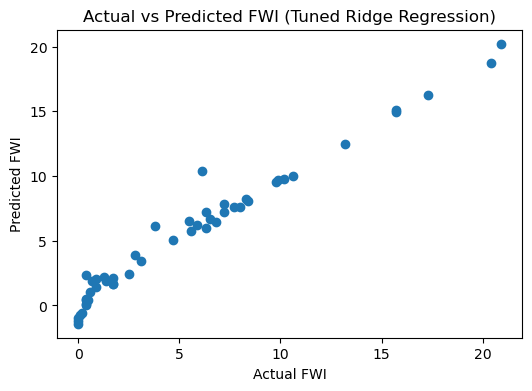

In [71]:

y_pred = best_ridge.predict(X_test_scaled)

# Plot Actual vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Actual vs Predicted FWI (Tuned Ridge Regression)")
plt.show()
